In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
# load data
data  = pd.read_csv('dementia_dataset.csv')

In [5]:
data.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [6]:
del data['Subject ID']

In [7]:
del data['MRI ID']

In [8]:
data = data.dropna()

In [9]:
data.head()

,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039


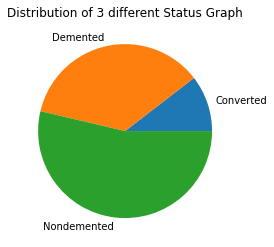

In [10]:
status = data['Group'].ravel() #extracting healthy, stress, uncertain and recovery 4 different status
drought = data['Group'].ravel() #extracting binary drought label as 0 and 1
labels, count = np.unique(status, return_counts=True)
plt.pie(count, labels = labels)
plt.title("Distribution of 3 different Status Graph")
plt.show() 

In [11]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

data['Group']= label_encoder.fit_transform(data['Group'])
data['M/F']= label_encoder.fit_transform(data['M/F'])
data['Hand']= label_encoder.fit_transform(data['Hand'])

data['Group'].unique()

array([2, 1, 0], dtype=int64)

In [117]:
X = data.drop(["Group"],axis =1)
y = data["Group"]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [15]:
ML_Model = []
accuracy = []
precision = []
recall = []
f1score = []

#function to call for storing the results
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    accuracy.append(round(a, 3))
    precision.append(round(b, 3))
    recall.append(round(c, 3))
    f1score.append(round(d, 3))

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred    = rf.predict(X_test)

rf_acc = accuracy_score(y_pred, y_test)
rf_prec = precision_score(y_pred, y_test,average='weighted')
rf_rec = recall_score(y_pred, y_test,average='weighted')
rf_f1 = f1_score(y_pred, y_test,average='weighted')

In [18]:
storeResults('Random Forest',rf_acc,rf_prec,rf_rec,rf_f1)

# SVM

In [19]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)

y_pred    = svm.predict(X_test)

svm_acc = accuracy_score(y_pred, y_test)
svm_prec = precision_score(y_pred, y_test,average='weighted')
svm_rec = recall_score(y_pred, y_test,average='weighted')
svm_f1 = f1_score(y_pred, y_test,average='weighted')

In [20]:
storeResults('Support Vector Machine',svm_acc,svm_prec,svm_rec,svm_f1)

# AdaBoost Classifier

In [21]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X_train, y_train)

y_pred    = ab.predict(X_test)

ab_acc = accuracy_score(y_pred, y_test)
ab_prec = precision_score(y_pred, y_test,average='weighted')
ab_rec = recall_score(y_pred, y_test,average='weighted')
ab_f1 = f1_score(y_pred, y_test,average='weighted')

In [22]:
storeResults('AdaBoost Classifier',ab_acc,ab_prec,ab_rec,ab_f1)

# MLP - ANN

In [23]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)

y_pred    = mlp.predict(X_test)

mlp_acc = accuracy_score(y_pred, y_test)
mlp_prec = precision_score(y_pred, y_test,average='weighted')
mlp_rec = recall_score(y_pred, y_test,average='weighted')
mlp_f1 = f1_score(y_pred, y_test,average='weighted')

In [24]:
storeResults('MLP-ANN',mlp_acc,mlp_prec,mlp_rec,mlp_f1)

# XGBoost

In [25]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=0)

xgb.fit(X_train, y_train)

y_pred    = xgb.predict(X_test)

xgb_acc = accuracy_score(y_pred, y_test)
xgb_prec = precision_score(y_pred, y_test,average='weighted')
xgb_rec = recall_score(y_pred, y_test,average='weighted')
xgb_f1 = f1_score(y_pred, y_test,average='weighted')

In [26]:
storeResults('XGBoost',xgb_acc,xgb_prec,xgb_rec,xgb_f1)

# Voting Classifier

In [119]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)

eclf1 = VotingClassifier(estimators=[('dt', clf1), ('rf', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
y_pred = eclf1.predict(X_test)

vot_acc = accuracy_score(y_pred, y_test)
vot_prec = precision_score(y_pred, y_test,average='weighted')
vot_rec = recall_score(y_pred, y_test,average='weighted')
vot_f1 = f1_score(y_pred, y_test,average='weighted')

In [121]:
storeResults('Voting Classifier',vot_acc,vot_prec,vot_rec,vot_f1)

# Stacking Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import StackingClassifier

estimators = [('rf', RandomForestClassifier(n_estimators=100)),('mlp', MLPClassifier(random_state=1, max_iter=300))]

clf = StackingClassifier(estimators=estimators, final_estimator=LGBMClassifier(n_estimators=100))


clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

stac_acc = accuracy_score(y_pred, y_test)
stac_prec = precision_score(y_pred, y_test,average='weighted')
stac_rec = recall_score(y_pred, y_test,average='weighted')
stac_f1 = f1_score(y_pred, y_test,average='weighted')

In [123]:
storeResults('Stacking Classifier',stac_acc,stac_prec,stac_rec,stac_f1)

# CNN + LSTM

In [29]:
X_train=X_train.values
X_test=X_test.values

X_train = X_train.reshape(-1, X_train.shape[1],1)
X_test = X_test.reshape(-1, X_test.shape[1],1)

Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

In [30]:
verbose, epoch, batch_size = 1, 10, 512
activationFunction='relu'

In [31]:
import tensorflow as tf
tf.keras.backend.clear_session()

model_en = tf.keras.models.Sequential([tf.keras.layers.Conv1D(filters=64,kernel_size=5,strides=1,padding="causal",activation="relu",input_shape=(X_train.shape[1],X_train.shape[2])),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, strides=1, padding="causal", activation="relu"),
    tf.keras.layers.MaxPooling1D(pool_size=2, strides=1, padding="valid"),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(3)
])

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(5e-4,
                                                             decay_steps=1000000,
                                                             decay_rate=0.98,
                                                             staircase=False)

model_en.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=lr_schedule, momentum=0.8),
              metrics=['acc'])
model_en.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 12, 64)            384       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 11, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 11, 32)            6176      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 10, 128)           82432     
_________________________________________________________________
flatten (Flatten)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

In [33]:
modelhistory = model_en.fit(X_train, Y_train, epochs=5, verbose=verbose, validation_split=0.2, batch_size = 2)

Epoch 1/5
113/113 [==============================] - 1s 4ms/step - loss: 0.2477 - acc: 0.4912 - val_loss: 0.1957 - val_acc: 0.5439
Epoch 2/5
113/113 [==============================] - 0s 4ms/step - loss: 0.2231 - acc: 0.5088 - val_loss: 0.1868 - val_acc: 0.5439
Epoch 3/5
113/113 [==============================] - 0s 4ms/step - loss: 0.2113 - acc: 0.5000 - val_loss: 0.1891 - val_acc: 0.5439
Epoch 4/5
113/113 [==============================] - 0s 4ms/step - loss: 0.2048 - acc: 0.5000 - val_loss: 0.1962 - val_acc: 0.5439
Epoch 5/5
113/113 [==============================] - 0s 4ms/step - loss: 0.1956 - acc: 0.5177 - val_loss: 0.1856 - val_acc: 0.6316


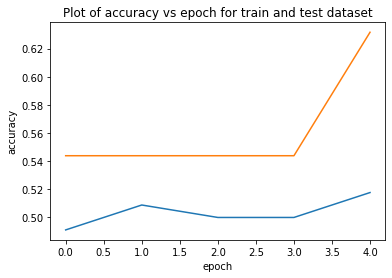

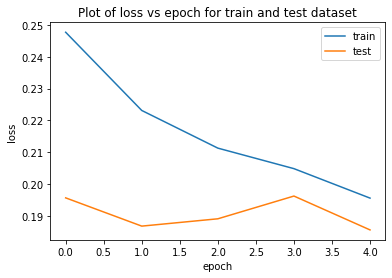

In [34]:
# Plot of accuracy vs epoch for train and test dataset
plt.plot(modelhistory.history['acc'])
plt.plot(modelhistory.history['val_acc'])
plt.title("Plot of accuracy vs epoch for train and test dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

# Plot of loss vs epoch for train and test dataset
plt.plot(modelhistory.history['loss'])
plt.plot(modelhistory.history['val_loss'])
plt.title("Plot of loss vs epoch for train and test dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [35]:
y_pred = model_en.predict(X_test, verbose=1)
y_pred = np.argmax(y_pred,axis=1)

#y_prob = cnnmodel.predict_proba(X_test)[:, 1]

ense_acc = accuracy_score(y_pred, y_test)
ense_prec = precision_score(y_pred, y_test,average='weighted')
ense_rec = recall_score(y_pred, y_test,average='weighted')
ense_f1 = f1_score(y_pred, y_test,average='weighted')

3/3 [==============================] - 0s 2ms/step


In [124]:
storeResults('CNN+LSTM',ense_acc,ense_prec,ense_rec,ense_f1)

# GWO

In [36]:
from FS.gwo import jfs   # change this to switch algorithm 

In [37]:
X = X.values

In [38]:
y = y.values

In [39]:
feat  = np.asarray(X)
label = np.asarray(y)

In [40]:
# split data into train & validation (70 -- 30)
xtrain, xtest, ytrain, ytest = train_test_split(feat, label, test_size=0.3, stratify=label)
fold = {'xt':xtrain, 'yt':ytrain, 'xv':xtest, 'yv':ytest}

In [41]:
# parameter
k    = 5     # k-value
N    = 5    # number of particles
T    = 5   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

Iteration: 1
Best (GWO): 0.30107476635514024
Iteration: 2
Best (GWO): 0.27331775700934585
Iteration: 3
Best (GWO): 0.27331775700934585
Iteration: 4
Best (GWO): 0.27331775700934585
Iteration: 5
Best (GWO): 0.27331775700934585


In [42]:
sf

array([ 0,  2,  4,  6,  7, 11])

In [43]:
# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)

In [44]:
x_train   = xtrain[:, sf]

In [45]:
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

In [46]:
# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

Feature Size: 6


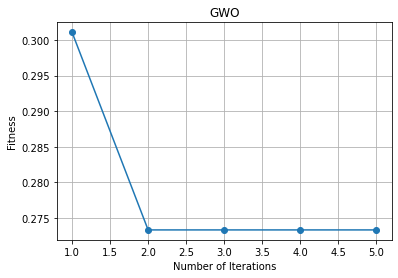

In [47]:
# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('GWO')
ax.grid()
plt.show()

In [48]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.utils.np_utils import to_categorical
import os
from tensorflow.keras.layers import  MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Convolution2D

In [49]:
X_fea = pd.DataFrame(x_train)
y_fea = pd.DataFrame(y_train)

In [50]:
from sklearn.preprocessing import MinMaxScaler
normalized = MinMaxScaler()
X = normalized.fit_transform(X_fea)#normalized dataset to 0 and 1
print("Normalized Dataset Values")
print(X)

Normalized Dataset Values
[[0.25       0.         0.41666667 0.25       0.91304348 0.39240506]
 [0.25       1.         0.52777778 0.         0.95652174 0.06751055]
 [0.         0.         0.58333333 0.25       0.95652174 0.44725738]
 ...
 [0.5        0.         0.61111111 1.         0.47826087 0.45428973]
 [0.5        1.         0.44444444 0.25       1.         0.12236287]
 [0.25       1.         0.05555556 0.         1.         0.04781997]]


In [51]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y_fea, test_size=0.2)

In [53]:
#now train extension CNN model
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [54]:
model = Sequential()
model.add(Convolution2D(32, (1 , 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Convolution2D(32, (1, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [55]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 6, 1, 32)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 6, 1, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 1, 32)          1056      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 1, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               49408     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                

In [56]:
hist1 = model.fit(X_train1, y_train, batch_size = 2, epochs = 5, validation_data=(X_test1, y_test), verbose=1)

Epoch 1/5
99/99 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3807 - val_loss: 0.0000e+00 - val_accuracy: 0.2800
Epoch 2/5
99/99 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3807 - val_loss: 0.0000e+00 - val_accuracy: 0.2800
Epoch 3/5
99/99 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3807 - val_loss: 0.0000e+00 - val_accuracy: 0.2800
Epoch 4/5
99/99 [==============================] - 0s 977us/step - loss: 0.0000e+00 - accuracy: 0.3807 - val_loss: 0.0000e+00 - val_accuracy: 0.2800
Epoch 5/5
99/99 [==============================] - 0s 977us/step - loss: 0.0000e+00 - accuracy: 0.3807 - val_loss: 0.0000e+00 - val_accuracy: 0.2800


In [57]:
predict = model.predict(X_test1)
predict = np.argmax(predict, axis=1)

y_test1 = np.argmax(y_test, axis=1)

tlgwo_acc = accuracy_score(predict, y_test1)
tlgwo_prec = precision_score(predict, y_test1,average='weighted')
tlgwo_rec = recall_score(predict, y_test1,average='weighted')
tlgwo_f1 = f1_score(predict, y_test1,average='weighted')

In [58]:
storeResults('TL-GWO',tlgwo_acc,tlgwo_prec,tlgwo_rec,tlgwo_f1)

# PSO

In [59]:
from FS.pso import jfs   # change this to switch algorithm 

In [60]:
# parameter
k    = 5     # k-value
N    = 5    # number of particles
T    = 5   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

Iteration: 1
Best (PSO): 0.4289408099688474
Iteration: 2
Best (PSO): 0.29015576323987546
Iteration: 3
Best (PSO): 0.29015576323987546
Iteration: 4
Best (PSO): 0.2893224299065421
Iteration: 5
Best (PSO): 0.2893224299065421


In [61]:
# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)

In [62]:
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

In [63]:
# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

Feature Size: 3


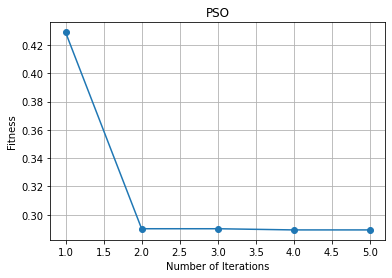

In [64]:
# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('PSO')
ax.grid()
plt.show()

In [65]:
X_fea = pd.DataFrame(x_train)
y_fea = pd.DataFrame(y_train)

In [66]:
from sklearn.preprocessing import MinMaxScaler
normalized = MinMaxScaler()
X = normalized.fit_transform(X_fea)#normalized dataset to 0 and 1
print("Normalized Dataset Values")
print(X)

Normalized Dataset Values
[[0.25       0.19098143 0.25      ]
 [0.25       0.45926487 0.25      ]
 [0.         0.         0.        ]
 [0.25       0.29329291 0.        ]
 [0.25       0.38272073 0.25      ]
 [0.         0.         0.        ]
 [0.25       0.25198939 0.        ]
 [0.25       0.22546419 1.        ]
 [0.25       0.18529746 0.        ]
 [0.         0.         0.25      ]
 [0.         0.         0.        ]
 [0.         0.         0.25      ]
 [0.         0.         0.        ]
 [0.25       0.17885563 0.25      ]
 [0.25       0.32360743 0.25      ]
 [0.5        0.23380068 0.25      ]
 [0.75       0.95035998 0.25      ]
 [0.25       0.44107617 0.25      ]
 [0.25       0.25502084 0.25      ]
 [0.         0.         0.5       ]
 [0.25       0.26184161 0.        ]
 [0.25       0.36074271 0.        ]
 [0.         0.         0.25      ]
 [0.25       0.26108374 0.        ]
 [0.25       0.48882152 0.25      ]
 [0.5        0.76885184 0.25      ]
 [0.75       0.70519136 0.        ]
 [

In [67]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y_fea, test_size=0.2)

In [69]:
#now train extension CNN model
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [70]:
model = Sequential()
model.add(Convolution2D(32, (1 , 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Convolution2D(32, (1, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [71]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 3, 1, 32)          64        
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 1, 32)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 1, 32)          1056      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 3, 1, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 96)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 256)               24832     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [72]:
hist1 = model.fit(X_train1, y_train, batch_size = 2, epochs = 5, validation_data=(X_test1, y_test), verbose=1)

Epoch 1/5
99/99 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3452 - val_loss: 0.0000e+00 - val_accuracy: 0.4200
Epoch 2/5
99/99 [==============================] - 0s 957us/step - loss: 0.0000e+00 - accuracy: 0.3452 - val_loss: 0.0000e+00 - val_accuracy: 0.4200
Epoch 3/5
99/99 [==============================] - 0s 952us/step - loss: 0.0000e+00 - accuracy: 0.3452 - val_loss: 0.0000e+00 - val_accuracy: 0.4200
Epoch 4/5
99/99 [==============================] - 0s 977us/step - loss: 0.0000e+00 - accuracy: 0.3452 - val_loss: 0.0000e+00 - val_accuracy: 0.4200
Epoch 5/5
99/99 [==============================] - 0s 958us/step - loss: 0.0000e+00 - accuracy: 0.3452 - val_loss: 0.0000e+00 - val_accuracy: 0.4200


In [73]:
predict = model.predict(X_test1)
predict = np.argmax(predict, axis=1)

y_test1 = np.argmax(y_test, axis=1)

tlpso_acc = accuracy_score(predict, y_test1)
tlpso_prec = precision_score(predict, y_test1,average='weighted')
tlpso_rec = recall_score(predict, y_test1,average='weighted')
tlpso_f1 = f1_score(predict, y_test1,average='weighted')

In [74]:
storeResults('TL-PSO',tlpso_acc,tlpso_prec,tlpso_rec,tlpso_f1)

# GA

In [75]:
from FS.ga import jfs   # change this to switch algorithm 

In [76]:
# parameter
k    = 5     # k-value
N    = 5    # number of particles
T    = 5   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

Generation: 1
Best (GA): 0.31874610591900315
Generation: 2
Best (GA): 0.2741510903426792
Generation: 3
Best (GA): 0.16228971962616826
Generation: 4
Best (GA): 0.16228971962616826
Generation: 5
Best (GA): 0.16228971962616826


In [77]:
# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)

In [78]:
x_train   = xtrain[:, sf]

In [79]:
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

In [80]:
# number of selected features
num_feat = fmdl['nf']
print("Feature Size:", num_feat)

Feature Size: 6


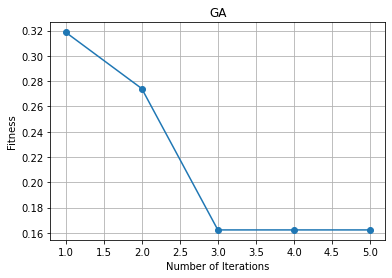

In [81]:
# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('GA')
ax.grid()
plt.show()

In [82]:
X_fea = pd.DataFrame(x_train)
y_fea = pd.DataFrame(y_train)

In [83]:
from sklearn.preprocessing import MinMaxScaler
normalized = MinMaxScaler()
X = normalized.fit_transform(X_fea)#normalized dataset to 0 and 1
print("Normalized Dataset Values")
print(X)

Normalized Dataset Values
[[0.25       0.         0.41176471 0.91304348 0.25       0.39240506]
 [0.25       0.         0.58823529 0.95652174 0.25       0.06751055]
 [0.         0.         0.70588235 0.95652174 0.         0.44725738]
 ...
 [0.5        0.         0.11764706 0.47826087 0.25       0.45428973]
 [0.5        0.         0.82352941 1.         0.         0.12236287]
 [0.25       0.         0.70588235 1.         0.25       0.04781997]]


In [84]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y_fea, test_size=0.2)

In [86]:
#now train extension CNN model
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [87]:
model = Sequential()
model.add(Convolution2D(32, (1 , 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Convolution2D(32, (1, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [88]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 6, 1, 32)          64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 1, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 6, 1, 32)          1056      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 192)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               49408     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [89]:
hist1 = model.fit(X_train1, y_train, batch_size = 2, epochs = 5, validation_data=(X_test1, y_test), verbose=1)

Epoch 1/5
99/99 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3655 - val_loss: 0.0000e+00 - val_accuracy: 0.3400
Epoch 2/5
99/99 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3655 - val_loss: 0.0000e+00 - val_accuracy: 0.3400
Epoch 3/5
99/99 [==============================] - 0s 993us/step - loss: 0.0000e+00 - accuracy: 0.3655 - val_loss: 0.0000e+00 - val_accuracy: 0.3400
Epoch 4/5
99/99 [==============================] - 0s 997us/step - loss: 0.0000e+00 - accuracy: 0.3655 - val_loss: 0.0000e+00 - val_accuracy: 0.3400
Epoch 5/5
99/99 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.3655 - val_loss: 0.0000e+00 - val_accuracy: 0.3400


In [90]:
predict = model.predict(X_test1)
predict = np.argmax(predict, axis=1)

y_test1 = np.argmax(y_test, axis=1)

tlga_acc = accuracy_score(predict, y_test1)
tlga_prec = precision_score(predict, y_test1,average='weighted')
tlga_rec = recall_score(predict, y_test1,average='weighted')
tlga_f1 = f1_score(predict, y_test1,average='weighted')

In [91]:
storeResults('TL-GA',tlga_acc,tlga_prec,tlga_rec,tlga_f1)

# MBO

In [92]:
from FS.mbo import jfs   # change this to switch algorithm 

In [93]:
# parameter
k    = 5     # k-value
N    = 5    # number of particles
T    = 5   # maximum number of iterations
opts = {'k':k, 'fold':fold, 'N':N, 'T':T}

# perform feature selection
fmdl = jfs(feat, label, opts)
sf   = fmdl['sf']

Generation: 1
Best (MBO): 0.19004672897196265
Generation: 2
Best (MBO): 0.10594236760124612
Generation: 3
Best (MBO): 0.10594236760124612
Generation: 4
Best (MBO): 0.10594236760124612
Generation: 5
Best (MBO): 0.10594236760124612


In [94]:
# model with selected features
num_train = np.size(xtrain, 0)
num_valid = np.size(xtest, 0)

In [95]:
x_train   = xtrain[:, sf]
y_train   = ytrain.reshape(num_train)  # Solve bug
x_valid   = xtest[:, sf]
y_valid   = ytest.reshape(num_valid)  # Solve bug

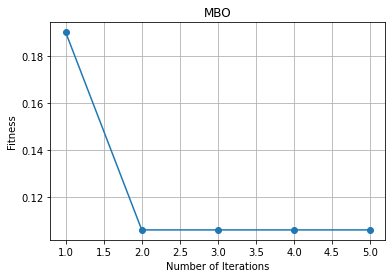

In [96]:
# plot convergence
curve   = fmdl['c']
curve   = curve.reshape(np.size(curve,1))
x       = np.arange(0, opts['T'], 1.0) + 1.0

fig, ax = plt.subplots()
ax.plot(x, curve, 'o-')
ax.set_xlabel('Number of Iterations')
ax.set_ylabel('Fitness')
ax.set_title('MBO')
ax.grid()
plt.show()

In [97]:
X_fea = pd.DataFrame(x_train)
y_fea = pd.DataFrame(y_train)

In [98]:
from sklearn.preprocessing import MinMaxScaler
normalized = MinMaxScaler()
X = normalized.fit_transform(X_fea)#normalized dataset to 0 and 1
print("Normalized Dataset Values")
print(X)

Normalized Dataset Values
[[0.25       0.         0.25       0.33160622 0.39240506]
 [0.25       1.         0.25       0.29015544 0.06751055]
 [0.         0.         0.         0.22279793 0.44725738]
 ...
 [0.5        0.         0.25       0.19689119 0.45428973]
 [0.5        1.         0.         0.49222798 0.12236287]
 [0.25       1.         0.25       0.4507772  0.04781997]]


In [99]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [100]:
X_train, X_test, y_train, y_test = train_test_split(X, y_fea, test_size=0.2)

In [101]:
#now train extension CNN model
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [102]:
model = Sequential()
model.add(Convolution2D(32, (1 , 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Convolution2D(32, (1, 1), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (1, 1)))
model.add(Flatten())
model.add(Dense(units = 256, activation = 'relu'))
model.add(Dense(units = y_train.shape[1], activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [103]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 5, 1, 32)          64        
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 1, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 5, 1, 32)          1056      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 1, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               41216     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

In [104]:
hist1 = model.fit(X_train1, y_train, batch_size = 2, epochs = 5, validation_data=(X_test1, y_test), verbose=1)

Epoch 1/5
99/99 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3858 - val_loss: 0.0000e+00 - val_accuracy: 0.2600
Epoch 2/5
99/99 [==============================] - 0s 987us/step - loss: 0.0000e+00 - accuracy: 0.3858 - val_loss: 0.0000e+00 - val_accuracy: 0.2600
Epoch 3/5
99/99 [==============================] - 0s 976us/step - loss: 0.0000e+00 - accuracy: 0.3858 - val_loss: 0.0000e+00 - val_accuracy: 0.2600
Epoch 4/5
99/99 [==============================] - 0s 967us/step - loss: 0.0000e+00 - accuracy: 0.3858 - val_loss: 0.0000e+00 - val_accuracy: 0.2600
Epoch 5/5
99/99 [==============================] - 0s 957us/step - loss: 0.0000e+00 - accuracy: 0.3858 - val_loss: 0.0000e+00 - val_accuracy: 0.2600


In [105]:
predict = model.predict(X_test1)
predict = np.argmax(predict, axis=1)

y_test1 = np.argmax(y_test, axis=1)

tlmbo_acc = accuracy_score(predict, y_test1)
tlmbo_prec = precision_score(predict, y_test1,average='weighted')
tlmbo_rec = recall_score(predict, y_test1,average='weighted')
tlmbo_f1 = f1_score(predict, y_test1,average='weighted')

In [106]:
storeResults('TL-MBO',tlmbo_acc,tlmbo_prec,tlmbo_rec,tlmbo_f1)

# Comparison

In [125]:
#creating dataframe
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'Accuracy' : accuracy,
                        'Precision': precision,
                        'Recall'   : recall,
                        'F1-Score': f1score,
                        
                      })

In [126]:
result

,ML Model,Accuracy,Precision,Recall,F1-Score
0,Random Forest,0.873,0.947,0.873,0.896
1,Support Vector Machine,0.563,1.000,0.563,0.721
2,AdaBoost Classifier,0.352,0.633,0.352,0.425
3,MLP-ANN,0.563,1.000,0.563,0.721
4,XGBoost,0.873,0.947,0.873,0.896
5,TL-GWO,1.000,1.000,1.000,1.000
6,TL-PSO,1.000,1.000,1.000,1.000
7,TL-GA,1.000,1.000,1.000,1.000
8,TL-MBO,1.000,1.000,1.000,1.000
9,Voting Classifier,1.000,1.000,1.000,1.000


# Modelling

In [19]:
import joblib
filename = 'model1.sav'
filename1 = 'model2.sav'
joblib.dump(clf, filename)
joblib.dump(eclf1, filename1)

['model2.sav']

# Graph

In [127]:
classifier = ML_Model
y_pos = np.arange(len(classifier))

# Accuracy

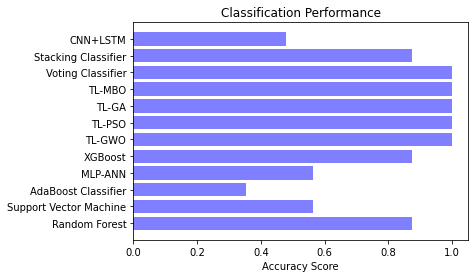

In [128]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, accuracy, align='center', alpha=0.5,color='blue')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Accuracy Score')
plt2.title('Classification Performance')
plt2.show()

# Precision

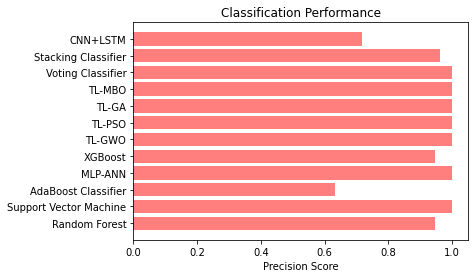

In [129]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, precision, align='center', alpha=0.5,color='red')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Precision Score')
plt2.title('Classification Performance')
plt2.show()

# Recall

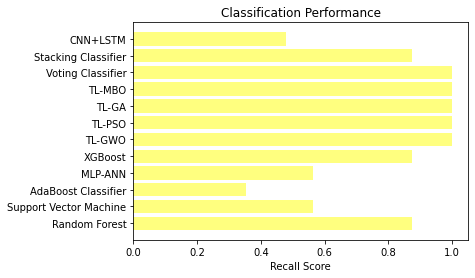

In [130]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, recall, align='center', alpha=0.5,color='yellow')
plt2.yticks(y_pos, classifier)
plt2.xlabel('Recall Score')
plt2.title('Classification Performance')
plt2.show()

# F1 Score

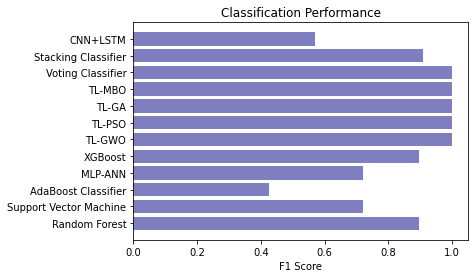

In [131]:
import matplotlib.pyplot as plt2
plt2.barh(y_pos, f1score, align='center', alpha=0.5,color='navy')
plt2.yticks(y_pos, classifier)
plt2.xlabel('F1 Score')
plt2.title('Classification Performance')
plt2.show()